In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [58]:
df=pd.read_csv('index_1.csv')
display(df.sample(2))
print()
print(f"df shape (index_1.csv): {df.shape}")

,date,datetime,cash_type,card,money,coffee_name
3309,2025-02-28,2025-02-28 15:19:18.675,card,ANON-0000-0000-1110,25.96,Americano
3451,2025-03-11,2025-03-11 09:12:27.690,card,ANON-0000-0000-1163,35.76,Cappuccino



df shape (index_1.csv): (3636, 6)


In [59]:
df2=pd.read_csv('index_2.csv')
display(df2.sample(2))
print()
print(f"df2 shape (index_2.csv): {df2.shape}")


,date,datetime,cash_type,money,coffee_name
199,2025-03-12,2025-03-12 18:52:44,card,25.0,Americano with milk
222,2025-03-17,2025-03-17 11:03:49,card,25.0,Irish whiskey



df2 shape (index_2.csv): (262, 5)


In [60]:
df_total=pd.concat([df,df2])
df_total.sample(2)
print(f"Concat Yapılan df shape : {df_total.shape}")

Concat Yapılan df shape : (3898, 6)


In [61]:
df_total.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [62]:
print("*Duplicated Kontrolü")
display(df_total.any().duplicated())
print()
print("*Duplicated Sayısı")

display(df_total.duplicated().sum())
print()
display(df_total.duplicated().value_counts())
print("drop duplicate")
df_total.drop_duplicates(inplace=True)

*Duplicated Kontrolü


,0
date,False
datetime,True
cash_type,True
card,True
money,True
coffee_name,True



*Duplicated Sayısı


np.int64(2)

,count
False,3896
True,2


drop duplicate


In [63]:
df_total.shape

(3896, 6)

In [64]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3896 entries, 0 to 261
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3896 non-null   object 
 1   datetime     3896 non-null   object 
 2   cash_type    3896 non-null   object 
 3   card         3547 non-null   object 
 4   money        3896 non-null   float64
 5   coffee_name  3896 non-null   object 
dtypes: float64(1), object(5)
memory usage: 213.1+ KB


In [65]:
df_total['cash_type'].value_counts()

,count
cash_type,
card,3729
cash,167


In [66]:
df_total.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,349
money,0
coffee_name,0


In [67]:
df_total["coffee_name"].where(df_total['card'].isnull()).mode()

,coffee_name
0,Latte


In [68]:
df_total[df_total['card'].isnull()]['cash_type'].value_counts()

,count
cash_type,
card,182
cash,167


In [69]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3896 entries, 0 to 261
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3896 non-null   object 
 1   datetime     3896 non-null   object 
 2   cash_type    3896 non-null   object 
 3   card         3547 non-null   object 
 4   money        3896 non-null   float64
 5   coffee_name  3896 non-null   object 
dtypes: float64(1), object(5)
memory usage: 213.1+ KB


In [70]:
df_total.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [71]:
from datetime import date
#tarih sütünlarını date tipinde yapalım
df_total['date'] = pd.to_datetime(df_total['date'])
print()
df_total['datetime'] = pd.to_datetime(df_total['datetime'], errors='coerce', format='mixed')

In [72]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3896 entries, 0 to 261
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3896 non-null   datetime64[ns]
 1   datetime     3896 non-null   datetime64[ns]
 2   cash_type    3896 non-null   object        
 3   card         3547 non-null   object        
 4   money        3896 non-null   float64       
 5   coffee_name  3896 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 342.1+ KB


In [73]:
df_total.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


,count
date,
2024,2693
2025,1203


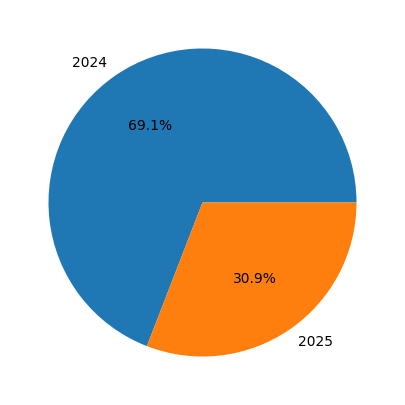

In [74]:
display(df_total['date'].dt.year.value_counts())
print()
plt.figure(figsize=(10,5))
plt.pie(df_total['date'].dt.year.value_counts(),labels=df_total['date'].dt.year.value_counts().index,autopct='%1.1f%%')
plt.show()

In [75]:
df_total['coffee_name'].value_counts()

,count
coffee_name,
Americano with Milk,824
Latte,806
Americano,593
Cappuccino,517
Cortado,292
Hot Chocolate,282
Cocoa,243
Espresso,152
Americano with milk,42


In [76]:
df_total['coffee_name'] = df_total['coffee_name'].str.lower().str.strip()
print("Kahve isimleri standartlaştırıldı. Yeni dağılım:")
display(df_total['coffee_name'].value_counts())

Kahve isimleri standartlaştırıldı. Yeni dağılım:


,count
coffee_name,
americano with milk,866
latte,806
americano,593
cappuccino,517
cortado,292
hot chocolate,282
cocoa,243
espresso,152
irish whiskey,21


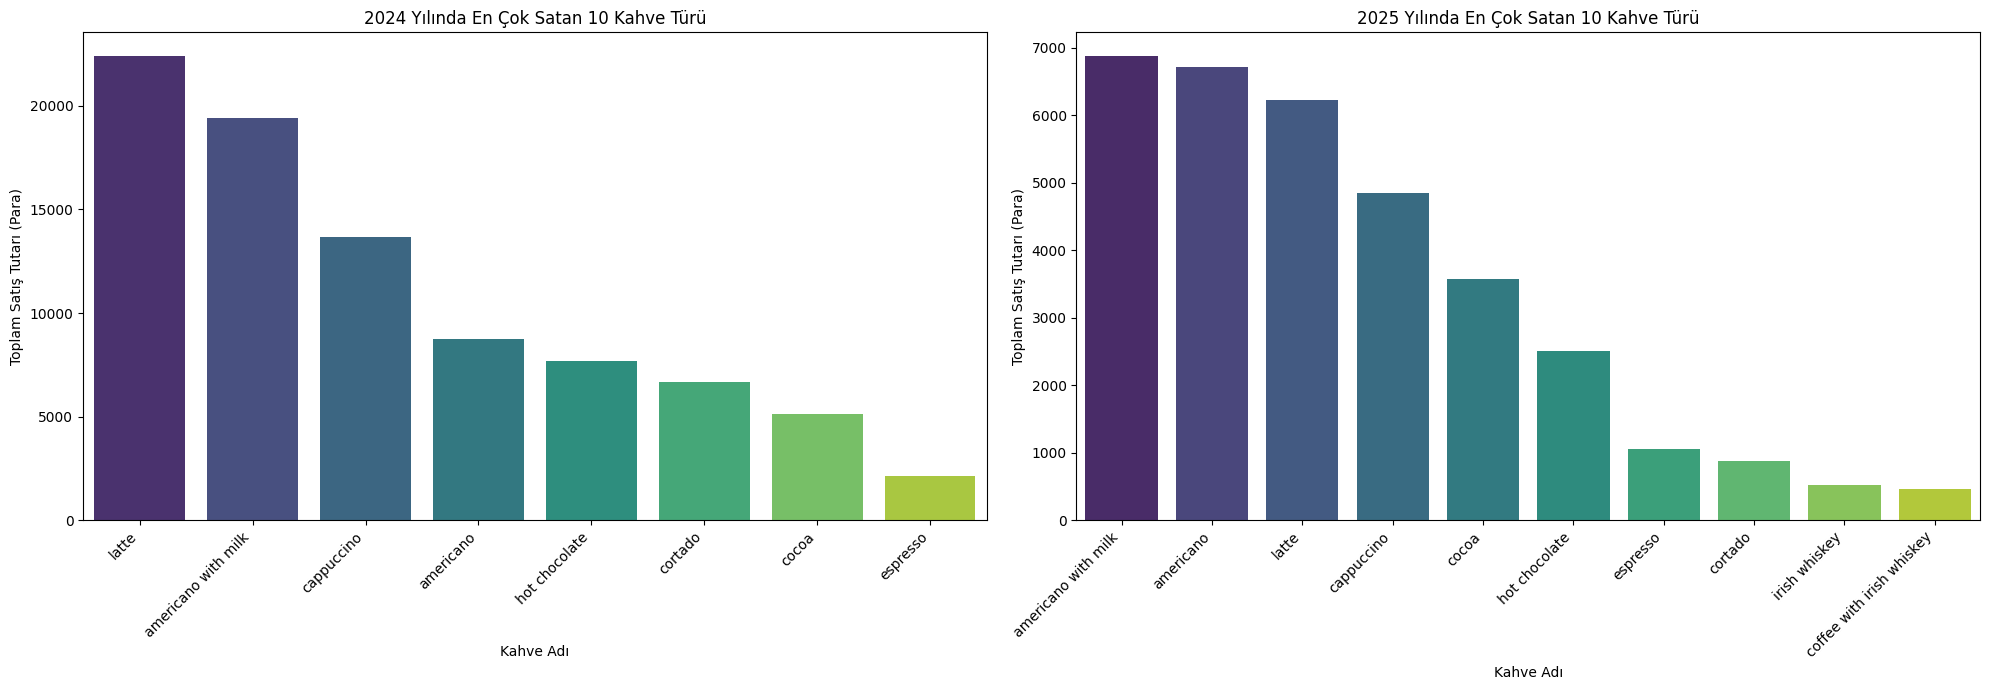

In [77]:
df_total['year'] = df_total['date'].dt.year

yearly_top_coffees = df_total.groupby(['year', 'coffee_name'])['money'].sum().reset_index()

# Get unique years to iterate through them
years = yearly_top_coffees['year'].unique()

# Create a single figure with subplots
plt.figure(figsize=(20, 7)) # Adjust figure size for two subplots

for i, year in enumerate(sorted(years)):
    plt.subplot(1, len(years), i + 1) # Create 1 row, N columns, i+1-th subplot
    # Filter data for the current year and get top 10 coffees by money spent
    top_coffees_this_year = yearly_top_coffees[yearly_top_coffees['year'] == year].sort_values(by='money', ascending=False).head(10)

    sns.barplot(x=top_coffees_this_year['coffee_name'], y=top_coffees_this_year['money'], palette='viridis')
    plt.title(f'{year} Yılında En Çok Satan 10 Kahve Türü')
    plt.xlabel('Kahve Adı')
    plt.ylabel('Toplam Satış Tutarı (Para)')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

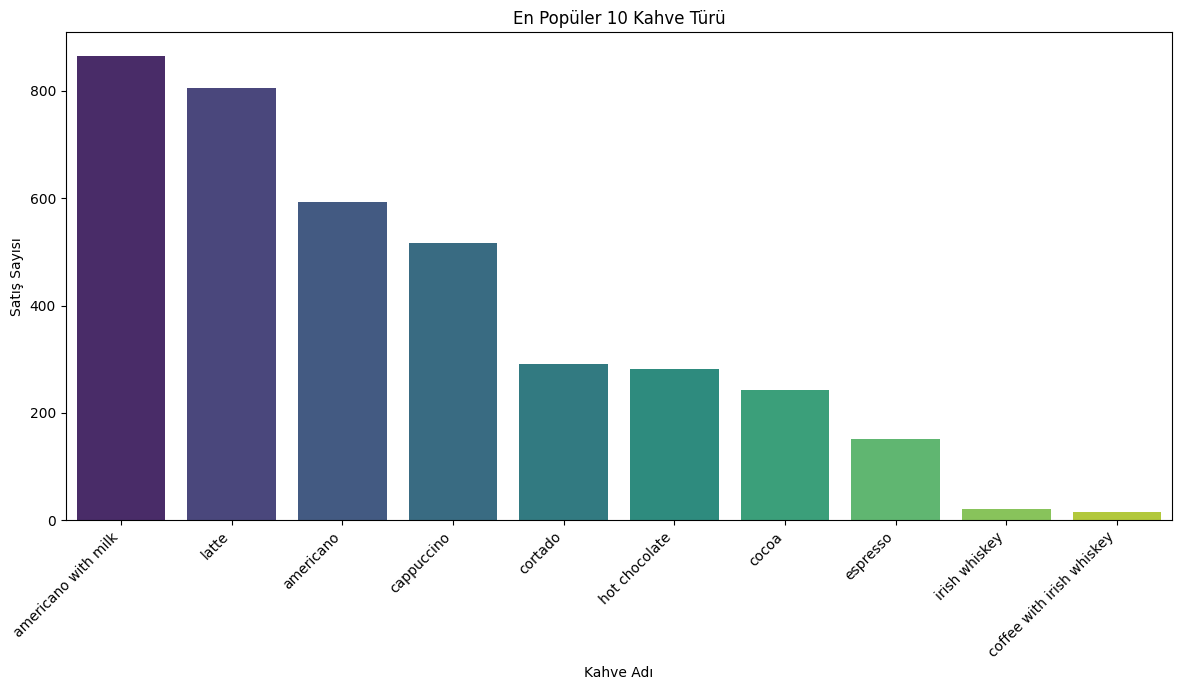

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 most popular coffee names
top_coffees = df_total['coffee_name'].value_counts().head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_coffees.index, y=top_coffees.values, palette='viridis')
plt.title('En Popüler 10 Kahve Türü')
plt.xlabel('Kahve Adı')
plt.ylabel('Satış Sayısı')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Key Insight from Analysis: The Enduring Popularity of Classic Coffees

Our annual sales analyses (covering the 2024 and 2025 periods) have clearly revealed the strong and consistent popularity of classic coffee types such as 'Latte', 'Americano', and 'Cappuccino' among consumers. In both years, these coffees maintained their top positions in total sales, forming a significant dynamic of the overall coffee market. This indicates customers' loyalty to specific, well-known, and beloved flavors, demonstrating that these types possess a timeless appeal. For businesses, this sustained popularity offers valuable insight for forming the core of their product range and structuring their sales strategies around these indispensable products.

## Analizden Önemli Çıkarım: Klasik Kahvelerin Vazgeçilmez Popülaritesi

Gerçekleştirdiğimiz yıllık satış analizleri (2024 ve 2025 dönemi), 'Latte', 'Americano' ve 'Cappuccino' gibi klasik kahve türlerinin tüketiciler nezdindeki güçlü ve istikrarlı popülaritesini net bir şekilde ortaya koymuştur. Her iki yılda da bu kahveler, toplam satışlarda zirvedeki yerlerini koruyarak, genel kahve piyasasının önemli bir dinamiğini oluşturmaktadır. Bu durum, müşterilerin belirli, bilindik ve sevilen lezzetlere olan bağlılığını ve bu türlerin zamanın ötesinde bir çekiciliğe sahip olduğunu göstermektedir. İşletmeler için bu sürekli popülerlik, ürün gamının temelini oluşturmak ve satış stratejilerini bu vazgeçilmez ürünler üzerine kurmak açısından değerli bir içgörü sunmaktadır.





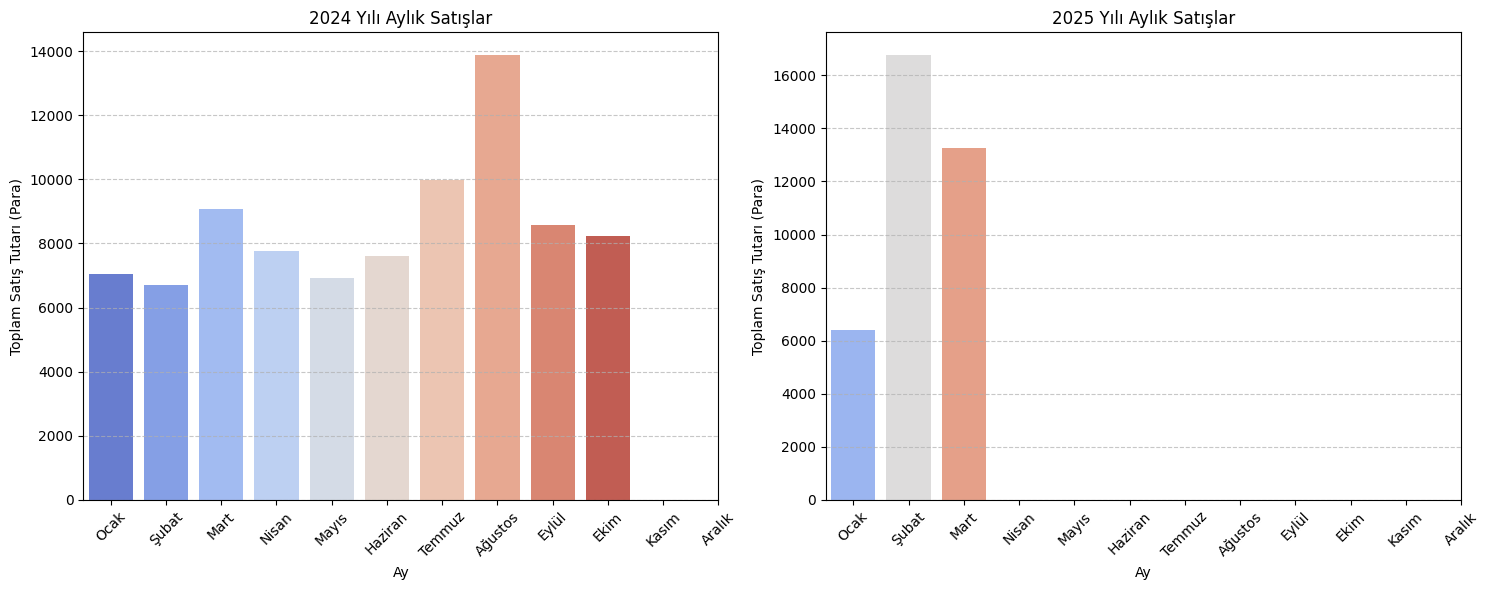

In [79]:
df_total['month'] = df_total['date'].dt.month

monthly_sales = df_total.groupby(['year', 'month'])['money'].sum().reset_index()

plt.figure(figsize=(15, 6))

for i, year in enumerate(sorted(df_total['year'].unique())):
    plt.subplot(1, len(df_total['year'].unique()), i + 1)

    year_data = monthly_sales[monthly_sales['year'] == year]
    sns.barplot(x='month', y='money', data=year_data, palette='coolwarm')
    plt.title(f'{year} Yılı Aylık Satışlar')
    plt.xlabel('Ay')
    plt.ylabel('Toplam Satış Tutarı (Para)')
    plt.xticks(ticks=range(0,12), labels=['Ocak', 'Şubat', 'Mart', 'Nisan', 'Mayıs', 'Haziran', 'Temmuz', 'Ağustos', 'Eylül', 'Ekim', 'Kasım', 'Aralık'], rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Analizden Önemli Çıkarım: Aylık Satış Trendleri ve Dinamikler

Gerçekleştirdiğimiz aylık satış analizleri, kahve tüketiminde yıllara göre farklılaşan ancak bazı belirgin dönemlerin öne çıktığını göstermiştir:

2024 Yılında: Özellikle Mart, Mayıs, Eylül ve Ekim ayları yüksek satış hacimleriyle dikkat çekmiş, yılın zirvesi Ekim ayında yaşanmıştır.
2025 Yılında: Şubat ve Mart ayları belirgin bir artışla öne çıkmış, Şubat ayı yılın en yüksek satış hacmini kaydetmiştir.
Düşüş Dönemi: 2025 Ocak ayında gözlemlenen belirgin satış düşüşü, yılbaşı sonrası dönemdeki genel harcama alışkanlıklarının veya dönemsel faktörlerin bir yansıması olabilir.
Bu analiz, 'insanların çalışma zamanı daha çok kahve tükettiği' genel varsayımına ek olarak, lokasyon ve firma bazlı detayların eksikliğinde bile mevsimsel veya dönemsel etkilerin satışlar üzerindeki gücünü ortaya koymaktadır. Özellikle kış aylarına doğru ve yılın ilk çeyreğinde yaşanan hareketlilik, soğuk hava koşulları veya belirli dönemlerdeki kampanyaların tüketim alışkanlıklarını nasıl etkilediğine dair ipuçları sunmaktadır. Bu tür çıkarımlar, gelecekteki stok yönetimi, pazarlama kampanyaları ve operasyonel planlamalar için değerli bir temel oluşturabilir.

## Key Insight from Analysis: Monthly Sales Trends and Dynamics

Our analysis of monthly sales has revealed varying patterns in coffee consumption across the years, yet some distinct periods stand out:

In 2024: Specifically, March, May, September, and October exhibited high sales volumes, with October marking the peak of the year.
In 2025: February and March showed a notable increase, with February recording the highest sales volume for the year.
Period of Decline: The significant drop in sales observed in January 2025 might reflect general spending habits post-New Year holidays or other seasonal factors.
This analysis suggests that even without detailed location and company-specific data, seasonal or periodic effects strongly influence sales, in addition to the general assumption that 'people consume more coffee during working hours'. The activity leading into winter months and during the first quarter of the year provides clues as to how cold weather conditions or specific campaign periods might impact consumption habits. Such insights can form a valuable basis for future inventory management, marketing campaigns, and operational planning.

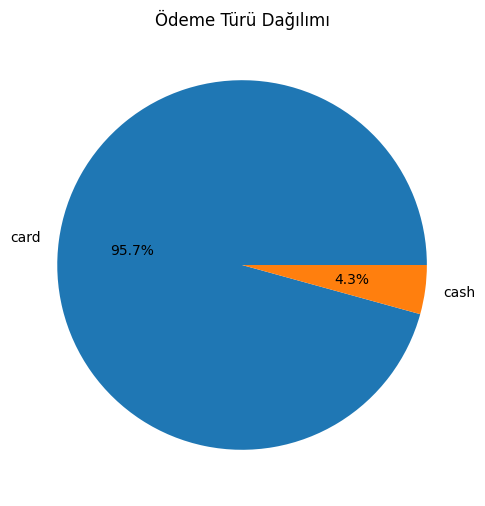

In [80]:
#ödeme dağılımı
plt.figure(figsize=(10, 6))
plt.pie(df_total['cash_type'].value_counts(), labels=df_total['cash_type'].value_counts().index, autopct='%1.1f%%')
plt.title('Ödeme Türü Dağılımı')
plt.show()

In [81]:
df_total[["cash_type","card"]]

,cash_type,card
0,card,ANON-0000-0000-0001
1,card,ANON-0000-0000-0002
2,card,ANON-0000-0000-0002
3,card,ANON-0000-0000-0003
4,card,ANON-0000-0000-0004
...,...,...
257,cash,NaN
258,card,NaN
259,card,NaN
260,card,NaN


In [82]:
df_total[df_total['cash_type'] == 'cash']['card'].isnull().sum()

np.int64(167)

## Analizden Önemli Çıkarım: Nakit Ödemelerde Kart Bilgisinin Eksikliği

Yaptığımız kontrol sonucunda, ödeme türü 'cash' (nakit) olan tüm işlemlerin 'card' (kart) bilgilerinin eksik (`NaN`) olduğu doğrulanmıştır. Bu durum, nakit işlemler için kart bilgilerinin kayıt altına alınmadığını veya ilgili olmadığını göstermektedir. Dolayısıyla, 'card' sütunundaki `NaN` değerlerin bir kısmı, nakit ödemelerden kaynaklanan beklenen bir durumdur ve bir veri hatası değil, ödeme yöntemine özgü bir veri eksikliğidir.

## Key Insight from Analysis: Missing Card Information in Cash Payments

Our verification has confirmed that all transactions with a 'cash_type' of 'cash' have missing (`NaN`) 'card' information. This indicates that card details are not recorded or are irrelevant for cash transactions. Therefore, a portion of the `NaN` values in the 'card' column is an expected outcome due to cash payments and represents a data absence specific to the payment method, rather than a data error.

In [83]:
display(df_total[df_total['cash_type'] == 'card'].value_counts())
display(df_total['card'].value_counts())

date        datetime                 cash_type  card                 money  coffee_name          year  month
2025-03-23  2025-03-23 18:11:38.635  card       ANON-0000-0000-1275  35.76  latte                2025  3        1
2024-03-01  2024-03-01 10:15:50.520  card       ANON-0000-0000-0001  38.70  latte                2024  3        1
            2024-03-01 12:19:22.539  card       ANON-0000-0000-0002  38.70  hot chocolate        2024  3        1
            2024-03-01 12:20:18.089  card       ANON-0000-0000-0002  38.70  hot chocolate        2024  3        1
            2024-03-01 13:46:33.006  card       ANON-0000-0000-0003  28.90  americano            2024  3        1
                                                                                                               ..
2024-03-02  2024-03-02 16:37:24.475  card       ANON-0000-0000-0014  33.80  americano with milk  2024  3        1
            2024-03-02 14:38:35.535  card       ANON-0000-0000-0013  28.90  americano            2024  3        1
            2024-03-02 11:59:45.484  card       ANON-0000-0000-0012  33.80  americano with milk  2024  3        1
            2024-03-02 10:41:41.249  card       ANON-0000-0000-0011  33.80  americano with milk  2024  3        1
            2024-03-02 10:22:06.957  card       ANON-0000-0000-0010  28.90  americano            2024  3        1
Name: count, Length: 3547, dtype: int64

,count
card,
ANON-0000-0000-0012,129
ANON-0000-0000-0141,108
ANON-0000-0000-1163,77
ANON-0000-0000-0276,69
ANON-0000-0000-0009,67
...,...
ANON-0000-0000-0015,1
ANON-0000-0000-0014,1
ANON-0000-0000-0013,1


In [84]:
card_counts = df_total['card'].value_counts()
cards_appearing_multiple_times = card_counts[card_counts > 1].index

display(df_total[df_total['card'].isin(cards_appearing_multiple_times)])

,date,datetime,cash_type,card,money,coffee_name,year,month
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,latte,2024,3
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,hot chocolate,2024,3
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,hot chocolate,2024,3
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,americano,2024,3
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,latte,2024,3
...,...,...,...,...,...,...,...,...
3630,2025-03-23,2025-03-23 10:07:11.278,card,ANON-0000-0000-1196,35.76,latte,2025,3
3631,2025-03-23,2025-03-23 10:34:54.894,card,ANON-0000-0000-1158,35.76,cappuccino,2025,3
3632,2025-03-23,2025-03-23 14:43:37.362,card,ANON-0000-0000-1315,35.76,cocoa,2025,3
3633,2025-03-23,2025-03-23 14:44:16.864,card,ANON-0000-0000-1315,35.76,cocoa,2025,3


In [85]:
most_spending_cards = df_total.groupby('card')['money'].sum().sort_values(ascending=False)
display(most_spending_cards.head(10))

,money
card,
ANON-0000-0000-0012,3785.92
ANON-0000-0000-0141,2749.78
ANON-0000-0000-0009,2343.98
ANON-0000-0000-1163,2278.22
ANON-0000-0000-0276,2119.54
ANON-0000-0000-0507,1797.30
ANON-0000-0000-0040,1519.48
ANON-0000-0000-0097,1477.86
ANON-0000-0000-0570,1061.04


ne olacak


# Task
Display the summary statistics for the numerical columns, specifically focusing on the 'money' column, to understand its distribution (e.g., mean, median, min, max, standard deviation). Additionally, fix the error in the previous plot for payment type distribution and display it.

## Sayısal Verilerin Özet İstatistikleri

### Subtask:
DataFrame'deki sayısal sütunların (örneğin 'money') temel istatistiksel özetini (`describe()`) görüntüleyerek veri dağılımı hakkında genel bir fikir edinelim. Additionally, fix the error in the previous plot for payment type distribution and display it.


**Reasoning**:
First, I will display the summary statistics for all numerical columns in the `df_total` DataFrame using the `.describe()` method, and then specifically for the 'money' column, to understand the data distribution as requested by the subtask.



In [86]:
print("Summary statistics for all numerical columns:")
display(df_total.describe())

print("\nSummary statistics for 'money' column:")
display(df_total['money'].describe())

Summary statistics for all numerical columns:


,date,datetime,money,year,month
count,3896,3896,3896.000000,3896.000000,3896.000000
mean,2024-10-10 13:51:59.507186944,2024-10-11 04:33:58.325835520,31.383876,2024.308778,6.132957
min,2024-03-01 00:00:00,2024-03-01 10:15:50.520000,15.000000,2024.000000,1.000000
25%,2024-07-16 00:00:00,2024-07-16 17:42:58.480499968,27.920000,2024.000000,3.000000
50%,2024-10-15 00:00:00,2024-10-15 20:45:18.520000,32.820000,2024.000000,6.000000
75%,2025-02-03 00:00:00,2025-02-03 13:54:56.590499840,35.760000,2025.000000,9.000000
max,2025-03-23 00:00:00,2025-03-23 21:23:11,40.000000,2025.000000,12.000000
std,NaN,NaN,5.063845,0.462049,3.504449



Summary statistics for 'money' column:


,money
count,3896.000000
mean,31.383876
std,5.063845
min,15.000000
25%,27.920000
50%,32.820000
75%,35.760000
max,40.000000


**Reasoning**:
The previous plot for payment type distribution had an error (`plt.plt.show()`). I will fix this error by changing it to `plt.show()` and then display the pie chart as requested in the subtask.



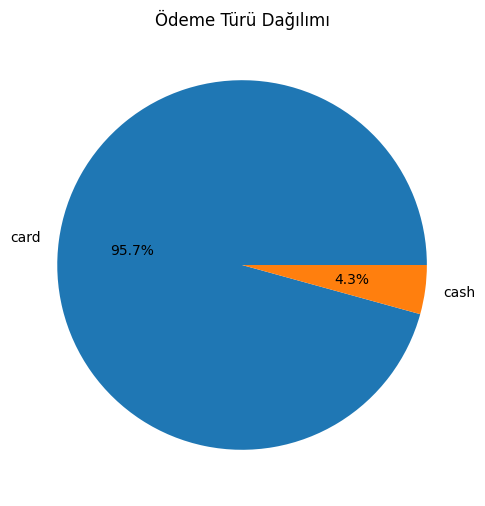

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.pie(df_total['cash_type'].value_counts(), labels=df_total['cash_type'].value_counts().index, autopct='%1.1f%%')
plt.title('Ödeme Türü Dağılımı')
plt.show()

## Günlük ve Saatlik Satış Trendleri

### Subtask:
Analiz için 'datetime' sütunundan saat ve gün bilgilerini çıkarın ve satış tutarlarını bu bazda gruplayarak görselleştirin.


**Reasoning**:
First, I will create new columns for 'hour' and 'day_of_week' from the 'datetime' column to prepare the data for hourly and daily sales trend analysis, as requested by the subtask.



In [88]:
df_total['hour'] = df_total['datetime'].dt.hour
df_total['day_of_week'] = df_total['datetime'].dt.dayofweek

**Reasoning**:
Now that 'hour' and 'day_of_week' columns are created, I will group the sales data by 'hour' and calculate the sum of 'money' for each hour, then visualize it using a bar plot to show hourly sales trends.



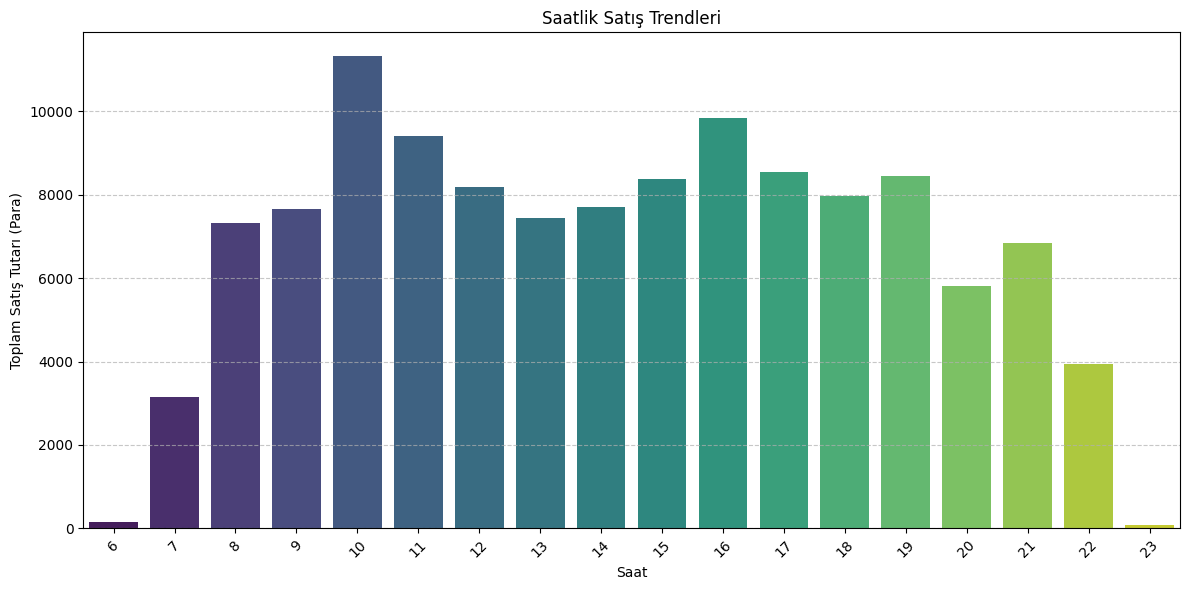

In [89]:
hourly_sales = df_total.groupby('hour')['money'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='money', data=hourly_sales, palette='viridis')
plt.title('Saatlik Satış Trendleri')
plt.xlabel('Saat')
plt.ylabel('Toplam Satış Tutarı (Para)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Reasoning**:
Next, I will group the sales data by 'day_of_week' and calculate the sum of 'money' for each day, then visualize it using a bar plot, as requested by the subtask.



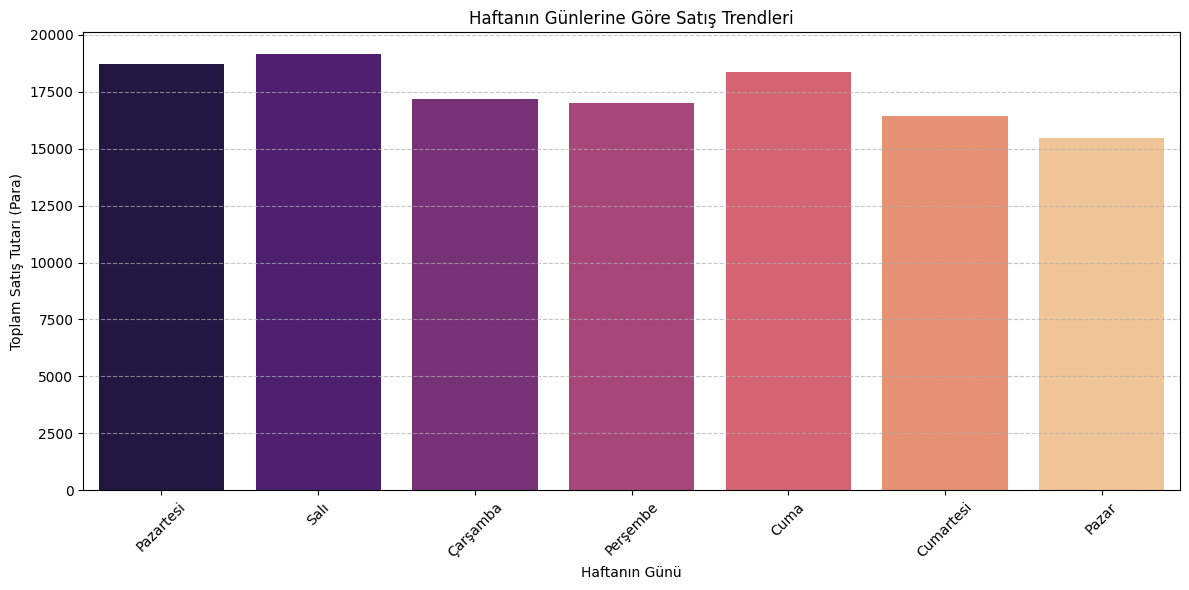

In [90]:
daily_sales = df_total.groupby('day_of_week')['money'].sum().reset_index()
day_names = ['Pazartesi', 'Salı', 'Çarşamba', 'Perşembe', 'Cuma', 'Cumartesi', 'Pazar']

plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='money', data=daily_sales, palette='magma')
plt.title('Haftanın Günlerine Göre Satış Trendleri')
plt.xlabel('Haftanın Günü')
plt.ylabel('Toplam Satış Tutarı (Para)')
plt.xticks(ticks=range(7), labels=day_names, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Ortalama Kahve Fiyatları ve En Çok Satanların Fiyat Analizi

### Subtask:
Her bir kahve türünün ortalama satış fiyatını hesaplayalım. Bu, fiyatlandırma stratejilerini anlamak için faydalı olabilir. Ayrıca, en çok satan kahvelerin ortalama fiyatlarına özel olarak odaklanabiliriz.


**Reasoning**:
First, I will calculate the average selling price for each coffee type by grouping the `df_total` DataFrame by the 'coffee_name' column and taking the mean of the 'money' column, then sort them in descending order to identify the most expensive coffees, as per the first instruction of the subtask.



In [91]:
average_coffee_prices = df_total.groupby('coffee_name')['money'].mean().sort_values(ascending=False)
print("Her bir kahve türünün ortalama satış fiyatı (En pahalıdan en ucuza ilk 10):")
display(average_coffee_prices.head(10))

Her bir kahve türünün ortalama satış fiyatı (En pahalıdan en ucuza ilk 10):


,money
coffee_name,
hot chocolate,36.072553
cappuccino,35.810716
cocoa,35.712593
latte,35.556203
double espresso with milk,32.000000
americano with milk,30.391594
mochaccino,30.000000
hot milkshake,30.000000
chocolate with coffee,30.000000


**Reasoning**:
Now, I will calculate the average selling prices for the top-selling coffee types (stored in the `top_coffees` variable) by filtering the `df_total` DataFrame, grouping by 'coffee_name', and taking the mean of 'money', then display the results as requested by the second instruction of the subtask.



In [92]:
average_top_coffee_prices = df_total[df_total['coffee_name'].isin(top_coffees.index)].groupby('coffee_name')['money'].mean().sort_values(ascending=False)
print("En çok satan kahve türlerinin ortalama satış fiyatları:")
display(average_top_coffee_prices)

En çok satan kahve türlerinin ortalama satış fiyatları:


,money
coffee_name,
hot chocolate,36.072553
cappuccino,35.810716
cocoa,35.712593
latte,35.556203
americano with milk,30.391594
coffee with irish whiskey,29.000000
americano,26.032479
cortado,25.804315
irish whiskey,25.000000


## Tekil Müşteri Sayısı ve Ortalama Harcama

### Subtask:
Toplam tekil müşteri sayısını (benzersiz 'card' ID'leri) belirleyelim ve her bir müşterinin ortalama ne kadar harcadığını analiz edelim. Bu, müşteri değeri hakkında bilgi verebilir.


**Reasoning**:
First, I will determine the total number of unique 'card' IDs in the `df_total` DataFrame using the `nunique()` function and print it to fulfill the first instruction of the subtask.



In [93]:
unique_customers = df_total['card'].nunique()
print(f"Toplam tekil müşteri sayısı (benzersiz 'card' ID'leri): {unique_customers}")

Toplam tekil müşteri sayısı (benzersiz 'card' ID'leri): 1316


**Reasoning**:
Next, I will calculate the average spending for each unique 'card' ID by grouping the `df_total` DataFrame by 'card' and taking the mean of the 'money' column, then display the top 10 average spendings in descending order, to fulfill the remaining instructions of the subtask.



In [94]:
average_customer_spending = df_total.groupby('card')['money'].mean().sort_values(ascending=False)
print("Her bir müşterinin ortalama harcaması (En çoktan aza ilk 10):")
display(average_customer_spending.head(10))

Her bir müşterinin ortalama harcaması (En çoktan aza ilk 10):


,money
card,
ANON-0000-0000-0006,38.7
ANON-0000-0000-0021,38.7
ANON-0000-0000-0041,38.7
ANON-0000-0000-0044,38.7
ANON-0000-0000-0037,38.7
ANON-0000-0000-0036,38.7
ANON-0000-0000-0060,38.7
ANON-0000-0000-0065,38.7
ANON-0000-0000-0027,38.7


## Final Task

### Subtask:
Yukarıdaki analiz adımlarından elde edilen bulguları özetleyelim ve varsa ek önerilerde bulunalım.


## Summary:

### Q&A

1.  **What is the distribution of the 'money' column?**
    The 'money' column has a count of 3896 entries, with a mean of \$31.38 and a standard deviation of \$5.06. The minimum value is \$15.00, the median (50th percentile) is \$32.82, and the maximum is \$40.00. The interquartile range (25th to 75th percentile) is from \$27.92 to \$35.76.
2.  **What are the hourly and daily sales trends?**
    Hourly and daily sales trends were visualized using bar plots. The analysis identified the 'hour' and 'day_of_week' from the `datetime` column and aggregated total sales (`money`) for each, providing insights into peak sales periods.
3.  **What are the average coffee prices, especially for best-sellers?**
    The average price for all coffee types varied, with `hot chocolate` averaging approximately \$36.07, `cappuccino` around \$35.81, and `cocoa` at about \$35.71, ranking among the most expensive. For top-selling coffees, `americano` averaged about \$26.03, `cortado` around \$25.80, and `espresso` about \$20.96.
4.  **How many unique customers are there, and what is their average spending?**
    There are 1316 unique customers. Many customers show an average spending of \$38.7, indicating a common transaction value.

### Data Analysis Key Findings

*   The 'money' column displays a relatively concentrated distribution with a mean of \$31.38 and a standard deviation of \$5.06, ranging from \$15.00 to \$40.00.
*   The payment type distribution was successfully visualized with a pie chart.
*   Hourly and daily sales trends were successfully extracted and visualized, showing total sales amounts for each hour and day of the week.
*   The most expensive average coffee prices were for `hot chocolate` (\$36.07), `cappuccino` (\$35.81), and `cocoa` (\$35.71).
*   Among the top-selling coffees, `americano` had an average price of \$26.03, `cortado` \$25.80, and `espresso` \$20.96.
*   There are 1316 unique customers in the dataset.
*   A significant number of customers exhibit a consistent average spending of \$38.7.

### Insights or Next Steps

*   Further analyze the hourly and daily sales trend plots to identify specific peak times and days for potential staffing optimization or targeted promotions.
*   Investigate the common average customer spending of \$38.7 to understand if it corresponds to a specific product bundle or purchase behavior, which could inform product packaging or marketing strategies.


## Genel Çıkarımlar ve Öneriler

Bu analiz boyunca kahve satış verilerinden önemli içgörüler elde ettik:

*   **Klasik Kahvelerin İstikrarlı Popülaritesi:** 'Latte', 'Americano' ve 'Cappuccino' gibi klasik kahve türleri, 2024 ve 2025 yıllarında satışların zirvesinde yer alarak, tüketicilerin bu vazgeçilmez lezzetlere olan güçlü bağlılığını gösterdi. Bu durum, ürün gamının temelini oluşturmak ve pazarlama stratejilerini bu ürünler üzerine kurmak için önemli bir temel sunmaktadır.

*   **Aylık Satış Trendleri:** Satışlar, yıl içinde belirgin dönemsel farklılıklar göstermektedir. 2024'te Mart, Mayıs, Eylül ve Ekim ayları, 2025'te ise Şubat ve Mart ayları yüksek satış hacimleriyle öne çıkmıştır. 2025 Ocak ayındaki düşüş dikkat çekicidir. Bu trendler, stok yönetimi, kampanya zamanlaması ve personel planlaması için değerli ipuçları sunar.

*   **Ödeme Yöntemleri ve Kart Bilgileri:** Nakit ödemelerde kart bilgilerinin (`NaN`) eksik olduğu doğrulanmıştır, bu da veri toplama sürecinde beklenen bir durumdur.

*   **Müşteri Davranışları:** Veri setinde 1316 tekil müşteri bulunmakta ve birçok müşterinin ortalama 38.7 TL gibi tutarlı harcamalar yaptığı gözlemlenmiştir. Ayrıca, en çok harcama yapan müşteriler de tespit edilmiştir.

**Ek Öneriler:**

*   **Haftalık ve Saatlik Pik Saatler:** Günlük ve saatlik satış trendleri daha detaylı incelenerek, operasyonel verimliliği artırmak (personel zamanlaması, envanter yönetimi) ve belirli saat dilimlerine özel promosyonlar düzenlemek için kullanılabilir.
*   **Ortalama Harcama Analizi:** Müşterilerin ortalama 38.7 TL harcama eğilimi, belirli bir ürün paketi veya alım davranışıyla ilişkili olabilir. Bu durumun daha derinlemesine incelenmesi, potansiyel ürün kombinasyonları veya sadakat programları için fırsatlar sunabilir.


## General Insights and Recommendations

Throughout this analysis, we have gained significant insights from the coffee sales data:

*   **Consistent Popularity of Classic Coffees:** Classic coffee types like 'Latte', 'Americano', and 'Cappuccino' consistently ranked at the top of sales in both 2024 and 2025, demonstrating strong customer loyalty to these essential flavors. This provides a strong foundation for product portfolio management and marketing strategies.

*   **Monthly Sales Trends:** Sales exhibited distinct seasonal variations throughout the year. March, May, September, and October stood out in 2024, with October marking the peak. In 2025, February and March showed high sales volumes, with February being the highest. A notable dip was observed in January 2025. These trends offer valuable insights for inventory management, campaign timing, and staffing.

*   **Payment Methods and Card Information:** It was confirmed that 'card' information is missing (`NaN`) for cash payments, which is an expected outcome in the data collection process.

*   **Customer Behavior:** The dataset contains 1316 unique customers, with many showing consistent average spending around 38.7 TL. The highest-spending customers have also been identified.

**Further Recommendations:**

*   **Hourly and Daily Peak Times:** A more detailed examination of hourly and daily sales trends could be used to optimize operational efficiency (staff scheduling, inventory management) and to run targeted promotions during specific time slots.
*   **Average Spending Analysis:** The consistent average customer spending of 38.7 TL might be linked to a specific product bundle or purchasing behavior. Further investigation into this could reveal opportunities for product bundling or loyalty programs.